In [625]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from config import api_key
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
%matplotlib inline

In [626]:
quandl.ApiConfig.api_key = api_key
#Variance Risk Premium: https://sites.google.com/site/haozhouspersonalhomepage
#EOM Nominal S&P, Nominal Dividends / Nominal Risk Free Rate: http://www.hec.unil.ch/agoyal/
#Consumer Sentiment: http://www.sca.isr.umich.edu/

In [627]:
file = '1989_2018_Data.csv'

data = pd.read_csv(file)
df1 = pd.DataFrame(data)
df1.head()
df1.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
0,1989-01-01,297.47,9.837,0.006892,9.12,NaN,97.9,30.239911,NaN,NaN,NaN,NaN,-3.327232,NaN,NaN
1,1989-02-01,288.86,9.924,0.007108,9.36,NaN,95.4,29.107215,NaN,NaN,NaN,-3.327232,1.634400,NaN,NaN
2,1989-03-01,294.87,10.011,0.007350,9.85,NaN,94.3,29.454600,NaN,NaN,NaN,1.634400,4.574438,4.961632,NaN
3,1989-04-01,309.64,10.130,0.007208,9.84,NaN,91.5,30.566634,NaN,NaN,NaN,4.574438,3.087089,2.940038,NaN
4,1989-05-01,320.52,10.249,0.007025,9.81,NaN,90.7,31.273295,NaN,NaN,NaN,3.087089,-1.202067,-1.487349,NaN


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
694,NaN,NaN,22.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,NaN,NaN,22.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,NaN,NaN,22.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,NaN,22.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,22.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [628]:
df_all_csv = '2004_to_2018_withGoogle.csv'

df_all_data = pd.read_csv(df_all_csv)
df_all = pd.DataFrame(df_all_data)

df_all.head()
df_all.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743,0.160482
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000,-0.273743
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000,-2.000000
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000,1.000000
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000,-1.000000


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
175,2018-08-01,2901.520020,52.31,0.001725,1.91,8.5030,96.2,55.467789,0.75,9.972800,-0.6,3.008605,0.399293,-0.589272,0.353563,33.0,1.0,1.0
176,2018-09-01,2913.979980,51.89,0.001792,1.95,7.9528,100.1,56.156870,0.80,8.198900,5.0,0.399293,-6.984062,-2.609312,-13.046560,31.0,-2.0,-3.0
177,2018-10-01,2711.739990,51.44,0.001908,2.19,-2.2509,98.6,52.716563,1.04,4.734967,-2.1,-6.984062,1.749912,-7.383355,15.505046,62.0,31.0,33.0
178,2018-11-01,2760.169922,51.19,0.001933,2.20,2.7329,97.5,53.920100,1.04,2.811600,-1.0,1.749912,-9.223502,8.733974,-8.733974,48.0,-14.0,-45.0
179,2018-12-01,2506.850098,51.07,0.002000,2.27,-4.0034,98.3,49.086550,0.97,-1.173800,2.4,-9.223502,NaN,-10.973414,-26.336194,77.0,29.0,43.0


In [629]:
#Create Filter for 1990 to 2018
filt_1990 = (df1['EOM'] >= '1990-03') & (df1['EOM'] < '2018-01')
dfx = df1[filt_1990]

#Create Filter for 2004 to 2017
filt_2004 = (df_all['EOM'] >= '2004-01-01') & (df_all['EOM'] < '2018-01-01')
df04 = df_all[filt_2004]

#Create FIlter for 2017 - 2018
filt_2018 = (df_all['EOM'] >= '2016-12-01') & (df_all['EOM'] < '2019-01-01')
df18 = df_all[filt_2018]

In [630]:
df04.head()
df04.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743,0.160482
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000,-0.273743
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000,-2.000000
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000,1.000000
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000,-1.000000


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,7.0,0.131911,2.006883,-1.877269,-13.140885,27.0,4.0,6.0
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,3.9,2.006883,2.289827,1.874972,7.312391,24.0,-3.0,-7.0
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,13.5,2.289827,0.427026,0.282943,3.819735,29.0,5.0,8.0
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,4.7,0.427026,3.482009,-1.862801,-8.755164,32.0,3.0,-2.0
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.669112,3.054983,-7.026461,34.0,2.0,-1.0


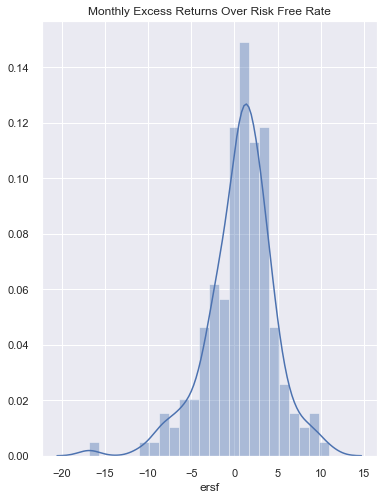

In [631]:
sns.set()
fig = plt.figure(figsize=(6,8))
ax1 = sns.distplot(df04['ersf'], bins=24).set_title('Monthly Excess Returns Over Risk Free Rate');

In [632]:
dfx.describe()
dfx.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,1163.313893,22.396469,0.002270,2.937904,17.307943,86.840719,52.045820,-0.289132,17.390332,0.176347,0.658096,0.668928,0.008948,-3.635747
std,543.692853,10.218236,0.001883,2.408457,13.929337,12.484535,14.204175,1.405820,11.135081,10.053697,4.100433,4.108894,5.683893,57.413770
min,304.000000,11.318000,0.000008,0.070000,-9.724000,55.300000,25.507636,-4.580000,3.052700,-30.000000,-16.793245,-16.793245,-13.574290,-294.411915
25%,764.380000,15.019000,0.000179,0.225000,8.354675,77.600000,44.239881,-0.757500,9.454383,-4.250000,-1.668809,-1.668809,-3.672094,-18.127597
50%,1158.590000,17.704500,0.002408,3.000000,13.408600,88.950000,51.087280,-0.030000,13.623633,1.100000,1.022578,1.022578,-0.036734,-0.231316
75%,1415.175000,27.594417,0.004115,5.250000,23.482400,94.925000,58.380221,0.297500,23.211900,6.500000,3.324716,3.343992,3.327125,13.259903
max,2673.610107,48.932019,0.006583,8.290000,80.610800,112.000000,92.170533,2.670000,59.880367,22.800000,11.090639,11.090639,20.864358,279.621622


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
Index,1.000000,0.902141,-0.549448,-0.527675,-0.254825,0.173381,0.405512,0.260710,-0.305007,0.118145,0.045316,-0.024209,0.001832,0.040746
D12,0.902141,1.000000,-0.666138,-0.649351,-0.267992,-0.104491,-0.016092,0.155327,-0.340338,0.098251,0.016986,0.027385,0.003475,0.025727
Rfree,-0.549448,-0.666138,1.000000,0.995661,0.102202,0.427237,0.072414,0.144739,0.119237,-0.138734,-0.017698,-0.026244,-0.009751,0.012278
fed_funds,-0.527675,-0.649351,0.995661,1.000000,0.112788,0.414117,0.090527,0.123847,0.133474,-0.174604,-0.023561,-0.029031,-0.006417,0.003342
VRP,-0.254825,-0.267992,0.102202,0.112788,1.000000,-0.087792,0.045263,-0.303380,0.798353,-0.186667,-0.235717,0.148494,-0.111396,-0.047591
ICS_ALL,0.173381,-0.104491,0.427237,0.414117,-0.087792,1.000000,0.588048,0.417148,-0.108570,0.413256,0.047155,-0.001441,-0.060053,0.048127
pd,0.405512,-0.016092,0.072414,0.090527,0.045263,0.588048,1.000000,0.204664,0.086752,0.029760,0.032415,-0.115717,-0.001570,0.029592
ff12_D,0.260710,0.155327,0.144739,0.123847,-0.303380,0.417148,0.204664,1.000000,-0.360951,0.350276,0.129061,0.141655,-0.000043,0.039779
vrp3,-0.305007,-0.340338,0.119237,0.133474,0.798353,-0.108570,0.086752,-0.360951,1.000000,-0.206029,0.040064,0.207043,0.077389,-0.167591
sent12_D,0.118145,0.098251,-0.138734,-0.174604,-0.186667,0.413256,0.029760,0.350276,-0.206029,1.000000,0.170626,0.096740,-0.063843,0.052724


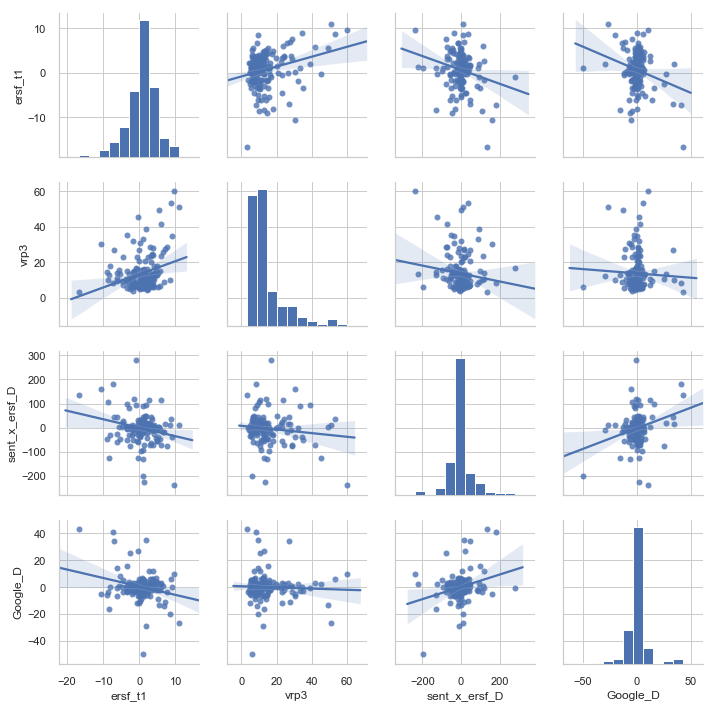

In [633]:
sns.set(style='whitegrid', palette='deep')
sns.pairplot(df04, vars=['ersf_t1','vrp3', 'sent_x_ersf_D', 'Google_D'],
                 kind='reg');

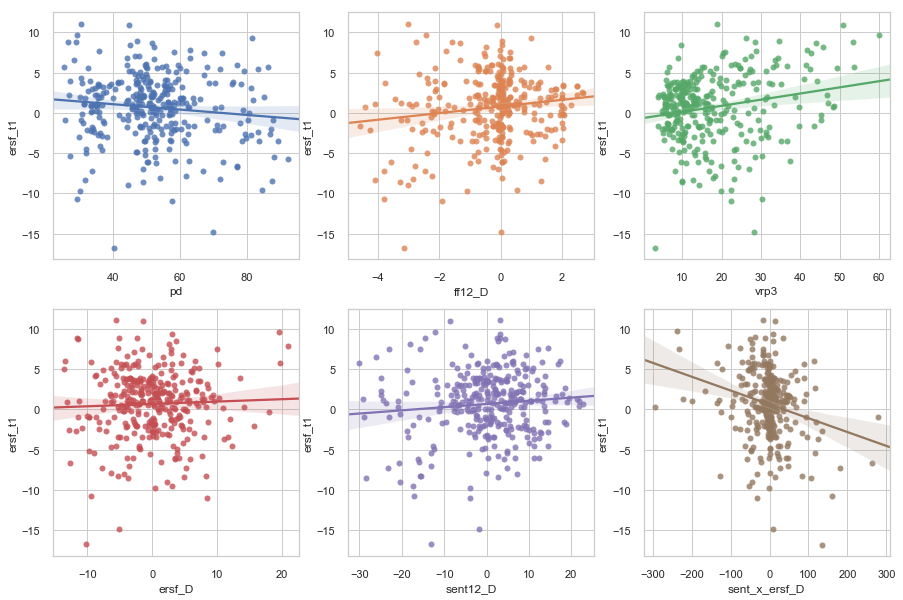

In [634]:
sns.set(style='whitegrid', palette='deep')
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15, 10))

sns.regplot(x='pd', y='ersf_t1', data=dfx, ax=axs[0,0])
sns.regplot(x='ff12_D', y='ersf_t1', data=dfx, ax=axs[0,1])
sns.regplot(x='vrp3', y='ersf_t1', data=dfx, ax=axs[0,2])
sns.regplot(x='ersf_D', y='ersf_t1', data=dfx, ax=axs[1,0])
sns.regplot(x='sent12_D', y='ersf_t1', data=dfx, ax=axs[1,1])
sns.regplot(x='sent_x_ersf_D', y='ersf_t1', data=dfx, ax=axs[1,2]);

## Regression Models without Google

In [635]:
#Regression Model with the following variables: Price-Dividend / Fed_Funds_Rate / Variance Risk Premium / Sentiment X Momentum
lr_model_no_google = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D', data=dfx).fit()
lr_model_no_google.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     17.29
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           6.94e-13
Time:                        16:37:20   Log-Likelihood:                -913.56
No. Observations:                 334   AIC:                             1837.
Df Residuals:                     329   BIC:                             1856.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9145      0.831      2.305      0.022       0.281       3.548
pd               -0.0569      0.015     -3.777      0.000      -0.087      -0.027
ff12_D            0.8696      0.162      5.352      0.000       0.550       1.189
vrp3              0.1102      0.020      5.391      0.000       0.070       0.150
sent_x_ersf_D    -0.0140      0.004     -3.844      0.000      -0.021      -0.007
==============================================================================
Omnibus:                       29.197   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.180
Skew:                          -0.648   Prob(JB):                     5.12e-09
Kurtosis:                       4.031   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [636]:
#Run same Linear Regression with sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

ind_variables = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D']
X = pd.DataFrame(dfx, columns=ind_variables)
y = pd.DataFrame(dfx, columns=['ersf_t1'])

sk_model_no_google = linear_model.LinearRegression()
model = sk_model_no_google.fit(X,y)

In [637]:
#Predicting January 2018 Returns
predictions = model.predict(X)
print(predictions[-1])

[0.28700587]


In [638]:
#sklearn R-Squared Value, Coefficients, Intercept
model.score(X,y), model.coef_, model.intercept_

(0.1736829332655645,
 array([[-0.05690863,  0.86958318,  0.11022067, -0.01400741]]),
 array([1.91450669]))

## Exploring Google Trends Impact

In [680]:
#Coefficients with Google Trends - Change in Searches for the Term "Stock Market"
df04.describe()
df04.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,1522.179168,30.249718,0.000999,1.341131,13.576756,81.947619,50.869848,-0.008988,13.648133,0.652976,0.667949,0.691062,-0.009860,-2.599680,25.440476,0.037344,0.011231
std,443.859461,8.958708,0.001367,1.769762,12.989038,11.785792,6.591079,1.259412,10.059378,10.351389,3.886939,3.905130,5.113633,58.594285,9.801443,9.600349,14.596382
min,735.090000,17.598000,0.000008,0.070000,-9.470800,55.300000,26.602531,-4.100000,3.052700,-29.200000,-16.793245,-16.793245,-11.633423,-238.769031,14.000000,-50.000000,-91.000000
25%,1190.170000,22.992000,0.000056,0.127500,5.828050,73.575000,47.992094,-0.090000,7.129600,-4.350000,-1.407628,-1.407628,-3.601212,-16.721380,20.000000,-3.000000,-2.000000
50%,1378.935000,27.556500,0.000183,0.230000,9.963050,83.050000,51.074718,0.030000,10.431000,1.900000,1.036320,1.036320,-0.055229,-0.272416,23.000000,0.000000,1.000000
75%,1924.500000,37.473505,0.001448,2.002500,17.149400,92.025000,55.652819,0.407500,14.947467,7.100000,2.996938,3.008325,2.903168,12.706484,27.000000,2.000000,4.000000
max,2673.610107,48.932019,0.004192,5.260000,77.816100,103.800000,64.282747,2.070000,59.880367,21.800000,10.959159,10.959159,19.571232,279.621622,100.000000,43.000000,49.000000


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
Index,1.000000,0.926910,-0.197435,-0.189128,-0.377489,0.579347,0.091090,0.240900,-0.460633,0.233288,0.131134,0.039837,0.004965,0.056154,0.082610,0.031602,0.021439
D12,0.926910,1.000000,-0.372532,-0.355154,-0.198381,0.361418,-0.283143,-0.030664,-0.265411,0.135172,0.042347,0.061130,0.014146,0.025965,0.234291,0.018707,0.001663
Rfree,-0.197435,-0.372532,1.000000,0.991658,-0.270263,0.267316,0.477579,0.422660,-0.363454,-0.243364,-0.069381,-0.088296,-0.019006,0.050823,-0.101470,0.027062,0.009706
fed_funds,-0.189128,-0.355154,0.991658,1.000000,-0.268302,0.230430,0.448993,0.357401,-0.355477,-0.281639,-0.088243,-0.109108,-0.018672,0.047813,-0.077483,0.034542,0.013225
VRP,-0.377489,-0.198381,-0.270263,-0.268302,1.000000,-0.483545,-0.468140,-0.371260,0.769026,-0.060501,-0.240775,0.204744,-0.122761,0.018431,0.009761,-0.093908,-0.114858
ICS_ALL,0.579347,0.361418,0.267316,0.230430,-0.483545,1.000000,0.582132,0.635770,-0.599270,0.489859,0.109358,0.056372,-0.062101,0.015227,-0.063983,0.032589,0.043246
pd,0.091090,-0.283143,0.477579,0.448993,-0.468140,0.582132,1.000000,0.706587,-0.512646,0.231991,0.195010,-0.070589,-0.030940,0.068783,-0.363775,0.032186,0.042797
ff12_D,0.240900,-0.030664,0.422660,0.357401,-0.371260,0.635770,0.706587,1.000000,-0.418635,0.347842,0.212527,0.199459,-0.012541,0.034151,-0.330206,0.025709,0.019488
vrp3,-0.460633,-0.265411,-0.363454,-0.355477,0.769026,-0.599270,-0.512646,-0.418635,1.000000,-0.004952,0.072134,0.287720,0.087702,-0.130402,0.032049,-0.046311,-0.041067
sent12_D,0.233288,0.135172,-0.243364,-0.281639,-0.060501,0.489859,0.231991,0.347842,-0.004952,1.000000,0.267856,0.194186,-0.049284,-0.064181,-0.232290,0.001956,0.035123


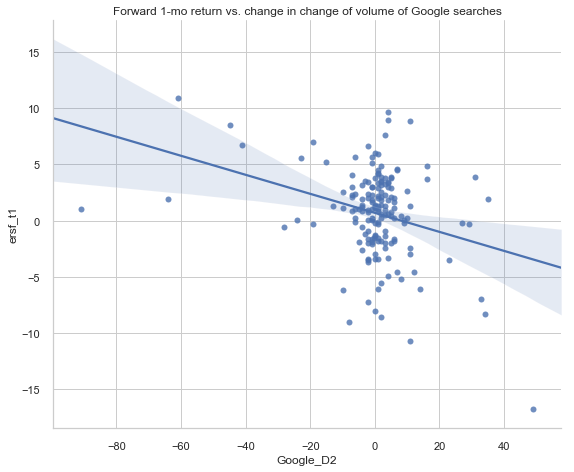

In [640]:
#Google Searches Change - Correlation with Target Variable
sns.set_style('whitegrid')
ax = sns.lmplot( x='Google_D2', y='ersf_t1', data=df04, fit_reg=True)
ax.fig.set_size_inches(9,7)
plt.title('Forward 1-mo return vs. change in change of volume of Google searches')
plt.show();

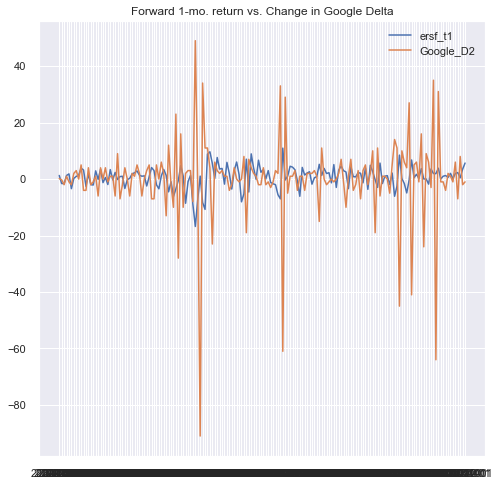

In [641]:
x = df04['EOM']
y = df04[['ersf_t1', 'Google_D2']]

sns.set()
fig = plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.title('Forward 1-mo. return vs. Change in Google Delta')
plt.legend(y);

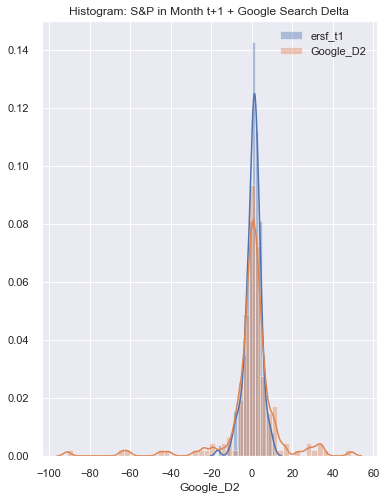

In [642]:
sns.set()
fig = plt.figure(figsize=(6,8))
ax1 = sns.distplot(df04['ersf_t1'])
ax2 = sns.distplot(df04['Google_D2']).set_title('Histogram: S&P in Month t+1 + Google Search Delta')
plt.legend(y);

In [643]:
#OLS multilinear regression modle with Google
lr_model_with_google_04_18 = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D+Google_D2', data=df04).fit()
lr_model_with_google_04_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     17.11
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.42e-13
Time:                        16:37:24   Log-Likelihood:                -431.12
No. Observations:                 168   AIC:                             874.2
Df Residuals:                     162   BIC:                             893.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0136      3.044      1.976      0.050       0.003      12.025
pd               -0.1419      0.057     -2.509      0.013      -0.254      -0.030
ff12_D            1.6373      0.280      5.850      0.000       1.085       2.190
vrp3              0.1383      0.029      4.759      0.000       0.081       0.196
sent_x_ersf_D    -0.0094      0.004     -2.176      0.031      -0.018      -0.001
Google_D2        -0.0742      0.017     -4.295      0.000      -0.108      -0.040
==============================================================================
Omnibus:                        5.931   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.853
Skew:                          -0.457   Prob(JB):                       0.0536
Kurtosis:                       3.025   Cond. No.                         724.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [644]:
#SK Learn OLS Model
ind_variables_w_google = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D2']
X_wG = pd.DataFrame(df04, columns=ind_variables_w_google)
y_wG = pd.DataFrame(df04, columns=['ersf_t1'])

sk_model_with_google_04_18 = linear_model.LinearRegression()
new_model = sk_model_with_google_04_18.fit(X_wG,y_wG)

In [645]:
predictions = new_model.predict(X_wG)
#2018-01 Prediction: 
predictions[-1]

array([0.55153166])

In [646]:
#R-Squared:
new_model.score(X_wG, y_wG)

0.34563638431240407

In [647]:
#Plot Residuals - Import modules
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

In [648]:
#Clean up DFs for Residuals
df04.reset_index(drop=True, inplace=True)
df04.head()
df04.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743,0.160482
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000,-0.273743
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000,-2.000000
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000,1.000000
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000,-1.000000


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,7.0,0.131911,2.006883,-1.877269,-13.140885,27.0,4.0,6.0
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,3.9,2.006883,2.289827,1.874972,7.312391,24.0,-3.0,-7.0
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,13.5,2.289827,0.427026,0.282943,3.819735,29.0,5.0,8.0
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,4.7,0.427026,3.482009,-1.862801,-8.755164,32.0,3.0,-2.0
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.669112,3.054983,-7.026461,34.0,2.0,-1.0


In [649]:
#Printing out the model Parameters
lr_model_with_google_04_18.params

Intercept        6.013641
pd              -0.141901
ff12_D           1.637254
vrp3             0.138254
sent_x_ersf_D   -0.009436
Google_D2       -0.074197
dtype: float64

In [650]:
# fitted values
model_fitted_y = lr_model_with_google_04_18.fittedvalues

# model residuals
model_residuals = lr_model_with_google_04_18.resid

# normalized residuals
model_norm_residuals = lr_model_with_google_04_18.get_influence().resid_studentized_internal

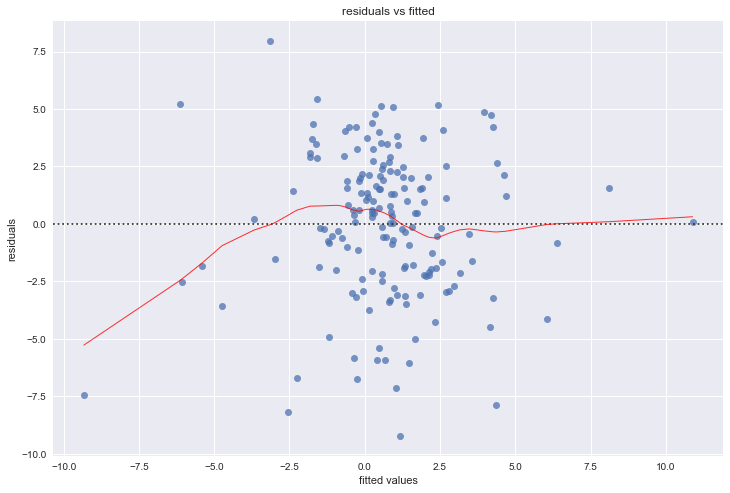

In [651]:
plt.style.use('seaborn')
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'ersf_t1', data=df04, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.75}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('residuals vs fitted')
plot_lm_1.axes[0].set_xlabel('fitted values')
plot_lm_1.axes[0].set_ylabel('residuals');

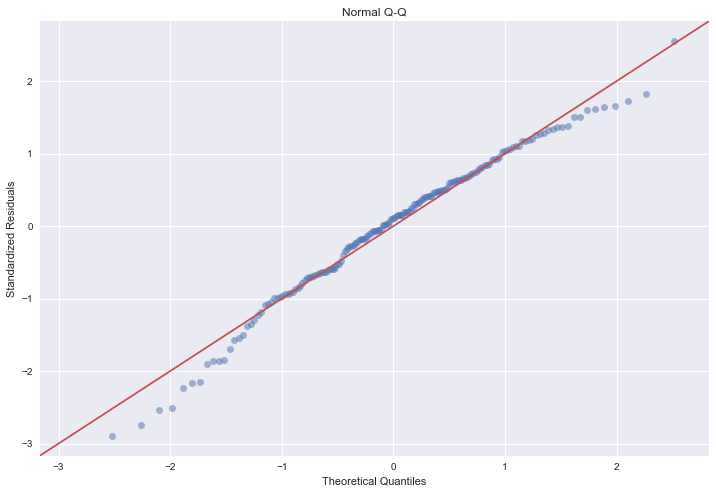

In [652]:
plt.style.use('seaborn')
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

In [653]:
#Calculating the Root Mean Squared Error on the Data
mse = mean_squared_error(df04['ersf_t1'], model_fitted_y)
rmse = np.sqrt(mse)
rmse

3.149551058208927

## Run Model on 2018 Untrained Data

In [654]:
df18.head()
df18.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
155,2016-12-01,2238.830000,45.700603,0.000425,0.54,12.5386,98.2,48.989069,0.30,12.019133,5.6,1.950777,1.916891,-1.607407,-9.001477,29.0,-29.0,-64.0
156,2017-01-01,2278.870117,45.927877,0.000425,0.65,7.4651,98.5,49.618451,0.31,8.796700,6.5,1.916891,3.845262,-0.033886,-0.220260,31.0,2.0,31.0
157,2017-02-01,2363.639893,46.155150,0.000433,0.66,10.9366,96.3,51.210751,0.28,10.313433,4.6,3.845262,0.062941,1.928371,8.870506,32.0,1.0,-1.0
158,2017-03-01,2362.719971,46.382424,0.000617,0.79,7.1965,96.9,50.939985,0.43,8.532733,5.9,0.062941,1.007029,-3.782321,-22.315693,32.0,0.0,-1.0
159,2017-04-01,2384.199951,46.661289,0.000667,0.90,4.4930,97.0,51.095887,0.53,7.542033,8.0,1.007029,1.247525,0.944088,7.552702,28.0,-4.0,-4.0


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
175,2018-08-01,2901.520020,52.31,0.001725,1.91,8.5030,96.2,55.467789,0.75,9.972800,-0.6,3.008605,0.399293,-0.589272,0.353563,33.0,1.0,1.0
176,2018-09-01,2913.979980,51.89,0.001792,1.95,7.9528,100.1,56.156870,0.80,8.198900,5.0,0.399293,-6.984062,-2.609312,-13.046560,31.0,-2.0,-3.0
177,2018-10-01,2711.739990,51.44,0.001908,2.19,-2.2509,98.6,52.716563,1.04,4.734967,-2.1,-6.984062,1.749912,-7.383355,15.505046,62.0,31.0,33.0
178,2018-11-01,2760.169922,51.19,0.001933,2.20,2.7329,97.5,53.920100,1.04,2.811600,-1.0,1.749912,-9.223502,8.733974,-8.733974,48.0,-14.0,-45.0
179,2018-12-01,2506.850098,51.07,0.002000,2.27,-4.0034,98.3,49.086550,0.97,-1.173800,2.4,-9.223502,NaN,-10.973414,-26.336194,77.0,29.0,43.0


In [655]:
#Build DF of Untrained Data: 2017-12-01 predicts 2018-01-01, etc. 12 observations, from 2017-12-01 to 2018-11-01
filt_run = (df18['EOM'] >= '2017-12-01') & (df18['EOM'] < '2019-01-01')
run18 = df18[filt_run]
run18 = run18.head(12)

In [656]:
run18.head()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.669112,3.054983,-7.026461,34.0,2.0,-1.0
168,2018-01-01,2823.810059,54.940000,0.001200,1.41,10.0329,95.7,51.398072,0.76,7.704133,-2.8,5.669112,-3.868703,2.187103,-6.123889,43.0,9.0,7.0
169,2018-02-01,2713.830078,54.850000,0.001358,1.42,-5.9018,99.7,49.477303,0.76,3.412800,3.4,-3.868703,-2.662211,-9.537815,-32.428571,88.0,45.0,36.0
170,2018-03-01,2640.870117,54.680000,0.001417,1.51,8.6653,101.4,48.296820,0.72,4.265467,4.5,-2.662211,0.290142,1.206492,5.429213,48.0,-40.0,-85.0
171,2018-04-01,2648.050049,54.380000,0.001533,1.69,-1.9751,98.8,48.695293,0.79,0.262800,1.8,0.290142,2.172452,2.952353,5.314235,43.0,-5.0,35.0


In [657]:
#Create DF with last twelve months of actual returns
df18_actual_returns = df18[['EOM', 'ersf']]
df18_actual_returns = df18_actual_returns.tail(12)
df18_actual_returns

,EOM,ersf
168,2018-01-01,5.669112
169,2018-02-01,-3.868703
170,2018-03-01,-2.662211
171,2018-04-01,0.290142
172,2018-05-01,2.172452
173,2018-06-01,0.490252
174,2018-07-01,3.597877
175,2018-08-01,3.008605
176,2018-09-01,0.399293
177,2018-10-01,-6.984062


In [658]:
#Select Indepdendent Variable from 2018 run, create DataFrame of Independent Variables
ind_variables = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D2']
X = pd.DataFrame(run18,columns=ind_variables)
X = X.set_index(run18['EOM'])
X

,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D2
EOM,,,,,
2017-12-01,54.639276,0.76,6.556300,-7.026461,-1.0
2018-01-01,51.398072,0.76,7.704133,-6.123889,7.0
2018-02-01,49.477303,0.76,3.412800,-32.428571,36.0
2018-03-01,48.296820,0.72,4.265467,5.429213,-85.0
2018-04-01,48.695293,0.79,0.262800,5.314235,35.0
2018-05-01,50.339971,0.79,5.365000,1.694080,-7.0
2018-06-01,51.212700,0.78,6.901400,-5.383042,13.0
2018-07-01,53.440039,0.76,10.273400,13.984316,-1.0
2018-08-01,55.467789,0.75,9.972800,0.353563,1.0


In [659]:
#Make Predictions with new Model (including Google D2)
predictions_2018 = lr_model_with_google_04_18.predict(X)
predictions_2018
len(predictions_2018)

EOM
2017-12-01    0.551532
2018-01-01    0.568061
2018-02-01   -1.656169
2018-03-01    7.184341
2018-04-01   -2.213545
2018-05-01    1.408914
2018-06-01    0.063955
2018-07-01    1.037343
2018-08-01    0.671903
2018-09-01    0.833973
2018-10-01   -1.704328
2018-11-01    3.875078
dtype: float64

12

In [660]:
#Create Dataframe with Predictions
df_predictions = pd.DataFrame(predictions_2018)
df_predictions = df_predictions.rename(columns={0: 'pred_ret_next_mo'})

In [661]:
df_predictions

,pred_ret_next_mo
EOM,
2017-12-01,0.551532
2018-01-01,0.568061
2018-02-01,-1.656169
2018-03-01,7.184341
2018-04-01,-2.213545
2018-05-01,1.408914
2018-06-01,0.063955
2018-07-01,1.037343
2018-08-01,0.671903


In [662]:
#Create Summary Dataframe with Predictions & Independent Variables
df_summary = X
df_summary = pd.concat([X.reset_index(), df_predictions.reset_index(drop=True)], axis=1)
df_summary = df_summary.merge(df18_actual_returns, how='outer', on='EOM')
df_summary['ersf'] = df_summary['ersf'].shift(-1)
df_summary = df_summary.head(12)
df_summary

,EOM,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D2,pred_ret_next_mo,ersf
0,2017-12-01,54.639276,0.76,6.556300,-7.026461,-1.0,0.551532,5.669112
1,2018-01-01,51.398072,0.76,7.704133,-6.123889,7.0,0.568061,-3.868703
2,2018-02-01,49.477303,0.76,3.412800,-32.428571,36.0,-1.656169,-2.662211
3,2018-03-01,48.296820,0.72,4.265467,5.429213,-85.0,7.184341,0.290142
4,2018-04-01,48.695293,0.79,0.262800,5.314235,35.0,-2.213545,2.172452
5,2018-05-01,50.339971,0.79,5.365000,1.694080,-7.0,1.408914,0.490252
6,2018-06-01,51.212700,0.78,6.901400,-5.383042,13.0,0.063955,3.597877
7,2018-07-01,53.440039,0.76,10.273400,13.984316,-1.0,1.037343,3.008605
8,2018-08-01,55.467789,0.75,9.972800,0.353563,1.0,0.671903,0.399293
9,2018-09-01,56.156870,0.80,8.198900,-13.046560,-3.0,0.833973,-6.984062


In [663]:
lr_model_with_google_04_18.params

Intercept        6.013641
pd              -0.141901
ff12_D           1.637254
vrp3             0.138254
sent_x_ersf_D   -0.009436
Google_D2       -0.074197
dtype: float64

In [664]:
#Create Model Formula
B0 = lr_model_with_google_04_18.params['Intercept'] 
Bpd = lr_model_with_google_04_18.params['pd'] 
Bff = lr_model_with_google_04_18.params['ff12_D'] 
Bvrp = lr_model_with_google_04_18.params['vrp3']
Bse = lr_model_with_google_04_18.params['sent_x_ersf_D']
Bg = lr_model_with_google_04_18.params['Google_D2']

In [665]:
#Run Prediction model
for i in range(len(df_summary)):
    prediction = B0 + (Bpd * df_summary.iloc[i]['pd']) \
                + (Bff * df_summary.iloc[i]['ff12_D']) \
                + (Bvrp * df_summary.iloc[i]['vrp3'])  \
                + (Bse * df_summary.iloc[i]['sent_x_ersf_D']) \
                + (Bg * df_summary.iloc[i]['Google_D2']) \
    
    print(df_summary.iloc[i]['EOM'], '--> Next Month prediction: ', prediction)

2017-12-01 --> Next Month prediction:  0.5515316630959813
2018-01-01 --> Next Month prediction:  0.5680607199617014
2018-02-01 --> Next Month prediction:  -1.6561688598565372
2018-03-01 --> Next Month prediction:  7.18434121737672
2018-04-01 --> Next Month prediction:  -2.213545403122155
2018-05-01 --> Next Month prediction:  1.4089136609676616
2018-06-01 --> Next Month prediction:  0.06395536991827744
2018-07-01 --> Next Month prediction:  1.0373429061913597
2018-08-01 --> Next Month prediction:  0.6719032411143765
2018-09-01 --> Next Month prediction:  0.8339730174692886
2018-10-01 --> Next Month prediction:  -1.704327813511796
2018-11-01 --> Next Month prediction:  3.875077520930083


In [666]:
mse = mean_squared_error(df_summary['ersf'], df_summary['pred_ret_next_mo'])
rmse = np.sqrt(mse)
rmse

5.5944358918132995

In [667]:
#Add 'Correct' Column --> Simple Buy / Sell / Hold Signal (Buy if predicted return > 0) --> Was Model Correct?
df_summary['correct'] = (((df_summary['pred_ret_next_mo'] > 0) & (df_summary['ersf'] > 0)) \
                         | ((df_summary['pred_ret_next_mo'] < 0) & (df_summary['ersf'] < 0)))

In [668]:
#Create 'month' column that equals the month of actual returns to more clearly show month -> predicted return -> actual return
df_summary['month'] = df_summary['EOM'].shift(-1)

In [669]:
df_summary = df_summary[['month', 'pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D2', 'pred_ret_next_mo', 'ersf', 'correct']]

In [679]:
#HARDCODE December into NA value
df_summary.month.fillna('2018-12-01', inplace=True)
df_summary

,month,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D2,pred_ret_next_mo,ersf,correct
0,2018-01-01,54.639276,0.76,6.556300,-7.026461,-1.0,0.551532,5.669112,True
1,2018-02-01,51.398072,0.76,7.704133,-6.123889,7.0,0.568061,-3.868703,False
2,2018-03-01,49.477303,0.76,3.412800,-32.428571,36.0,-1.656169,-2.662211,True
3,2018-04-01,48.296820,0.72,4.265467,5.429213,-85.0,7.184341,0.290142,True
4,2018-05-01,48.695293,0.79,0.262800,5.314235,35.0,-2.213545,2.172452,False
5,2018-06-01,50.339971,0.79,5.365000,1.694080,-7.0,1.408914,0.490252,True
6,2018-07-01,51.212700,0.78,6.901400,-5.383042,13.0,0.063955,3.597877,True
7,2018-08-01,53.440039,0.76,10.273400,13.984316,-1.0,1.037343,3.008605,True
8,2018-09-01,55.467789,0.75,9.972800,0.353563,1.0,0.671903,0.399293,True
9,2018-10-01,56.156870,0.80,8.198900,-13.046560,-3.0,0.833973,-6.984062,False


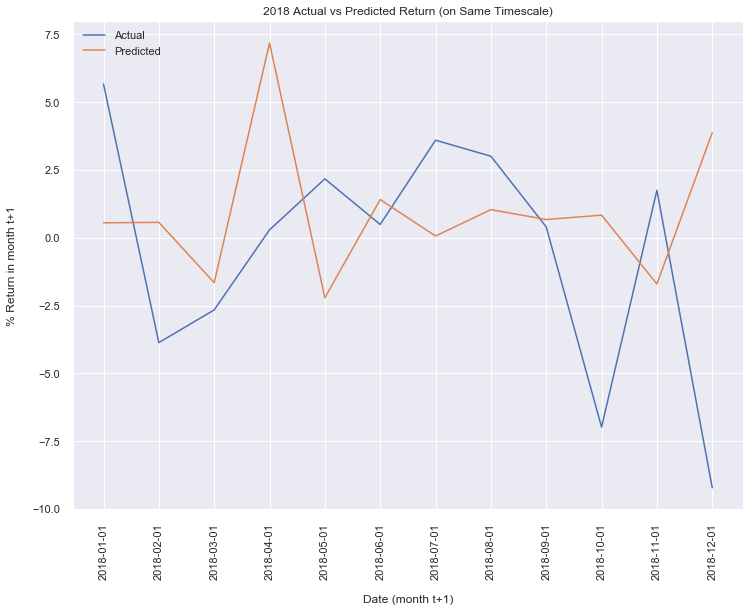

In [671]:
sns.set()
x = df_summary['month']
fig = plt.figure(figsize=(12,9))
plt.plot(x, df_summary['ersf'])
plt.plot(x, df_summary['pred_ret_next_mo'])

plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.title('2018 Actual vs Predicted Return (on Same Timescale)')
plt.xticks(df_summary['month'], rotation='vertical')
plt.xlabel('Date (month t+1)', labelpad=15)
plt.ylabel('% Return in month t+1', labelpad=15)

plt.show();


In [672]:
dec_2018_return = df_summary['ersf'].loc[df_summary['month'] == '2018-12-01']
z_score = (dec_2018_return - df04['ersf'].mean()) / df04['ersf'].std()
z_score

from scipy.stats import norm
two_tailed = 2 * norm.cdf(z_score)
two_tailed

11   -2.544792
Name: ersf, dtype: float64

array([0.01093428])

## Playground - Experiment with New Engineered Variables

In [673]:
df04.tail()
df04.shape

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,7.0,0.131911,2.006883,-1.877269,-13.140885,27.0,4.0,6.0
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,3.9,2.006883,2.289827,1.874972,7.312391,24.0,-3.0,-7.0
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,13.5,2.289827,0.427026,0.282943,3.819735,29.0,5.0,8.0
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,4.7,0.427026,3.482009,-1.862801,-8.755164,32.0,3.0,-2.0
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.669112,3.054983,-7.026461,34.0,2.0,-1.0


(168, 18)

In [674]:
#Import Volume Weighted Moving Average Data
fileX = '04_18_withVWMA.csv'
data = pd.read_csv(fileX)

df_vwma = pd.DataFrame(data)

In [675]:
df_vwma = pd.concat([df04, df_vwma], axis = 1)

In [676]:
df_vwma.head()
df_vwma.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,...,sent_x_ersf_D,Google,Google_D,Google_D2,Date,Close,Volume,vwma,vwma_delta,volume_delta2
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,...,-71.738239,28.0,0.273743,0.160482,2004-01-31,1131.13,32820000000,1132.902945,0.049492,0.021172
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,...,-7.417861,28.0,0.000000,-0.273743,2004-02-29,1144.94,27985600000,1142.563293,0.008527,-0.040964
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,...,-52.009454,26.0,-2.000000,-2.000000,2004-03-31,1126.21,33597900000,1119.019373,-0.020606,-0.029133
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,...,-0.324572,25.0,-1.000000,1.000000,2004-04-30,1107.30,31611900000,1132.278261,0.011849,0.032455
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,...,-5.480574,23.0,-2.000000,-1.000000,2004-05-31,1120.68,29326400000,1102.747364,-0.026081,-0.037930


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,...,sent_x_ersf_D,Google,Google_D,Google_D2,Date,Close,Volume,vwma,vwma_delta,volume_delta2
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,...,-13.140885,27.0,4.0,6.0,2017-08-31,2471.65,70616030000,2453.533648,-0.000720,-0.009558
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,...,7.312391,24.0,-3.0,-7.0,2017-09-30,2519.36,66337980000,2492.880424,0.016037,0.016756
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,...,3.819735,29.0,5.0,8.0,2017-10-31,2575.26,70871570000,2560.400262,0.027085,0.011048
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,...,-8.755164,32.0,3.0,-2.0,2017-11-30,2647.58,73173260000,2595.268508,0.013618,-0.013467
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,...,-7.026461,34.0,2.0,-1.0,2017-12-31,2673.61,65251190000,2662.943427,0.026076,0.012458


In [677]:
df_vwma.describe()
df_vwma.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,...,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2,Close,Volume,vwma,vwma_delta,volume_delta2
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000
mean,1522.179168,30.249718,0.000999,1.341131,13.576756,81.947619,50.869848,-0.008988,13.648133,0.652976,...,-0.009860,-2.599680,25.440476,0.037344,0.011231,1522.820476,7.428571e+10,1517.459732,0.006047,-0.000013
std,443.859461,8.958708,0.001367,1.769762,12.989038,11.785792,6.591079,1.259412,10.059378,10.351389,...,5.113633,58.594285,9.801443,9.600349,14.596382,445.043013,2.562913e+10,440.965477,0.035575,0.044227
min,735.090000,17.598000,0.000008,0.070000,-9.470800,55.300000,26.602531,-4.100000,3.052700,-29.200000,...,-11.633423,-238.769031,14.000000,-50.000000,-91.000000,735.090000,2.658680e+10,761.728173,-0.219648,-0.165365
25%,1190.170000,22.992000,0.000056,0.127500,5.828050,73.575000,47.992094,-0.090000,7.129600,-4.350000,...,-3.601212,-16.721380,20.000000,-3.000000,-2.000000,1190.170000,6.218296e+10,1196.623218,-0.006150,-0.025342
50%,1378.935000,27.556500,0.000183,0.230000,9.963050,83.050000,51.074718,0.030000,10.431000,1.900000,...,-0.055229,-0.272416,23.000000,0.000000,1.000000,1378.935000,7.475207e+10,1369.054500,0.012460,-0.006042
75%,1924.500000,37.473505,0.001448,2.002500,17.149400,92.025000,55.652819,0.407500,14.947467,7.100000,...,2.903168,12.706484,27.000000,2.000000,4.000000,1925.345000,8.615378e+10,1906.242603,0.025709,0.019030
max,2673.610107,48.932019,0.004192,5.260000,77.816100,103.800000,64.282747,2.070000,59.880367,21.800000,...,19.571232,279.621622,100.000000,43.000000,49.000000,2673.610000,1.618436e+11,2662.943427,0.116445,0.167457


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,...,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2,Close,Volume,vwma,vwma_delta,volume_delta2
Index,1.000000,0.926910,-0.197435,-0.189128,-0.377489,0.579347,0.091090,0.240900,-0.460633,0.233288,...,0.004965,0.056154,0.082610,0.031602,0.021439,0.999914,-0.114246,0.998506,0.128850,-0.000855
D12,0.926910,1.000000,-0.372532,-0.355154,-0.198381,0.361418,-0.283143,-0.030664,-0.265411,0.135172,...,0.014146,0.025965,0.234291,0.018707,0.001663,0.926739,0.183278,0.927670,0.024514,0.009385
Rfree,-0.197435,-0.372532,1.000000,0.991658,-0.270263,0.267316,0.477579,0.422660,-0.363454,-0.243364,...,-0.019006,0.050823,-0.101470,0.027062,0.009706,-0.197329,-0.458897,-0.196965,-0.026406,-0.019329
fed_funds,-0.189128,-0.355154,0.991658,1.000000,-0.268302,0.230430,0.448993,0.357401,-0.355477,-0.281639,...,-0.018672,0.047813,-0.077483,0.034542,0.013225,-0.189140,-0.413232,-0.188681,-0.050427,-0.022783
VRP,-0.377489,-0.198381,-0.270263,-0.268302,1.000000,-0.483545,-0.468140,-0.371260,0.769026,-0.060501,...,-0.122761,0.018431,0.009761,-0.093908,-0.114858,-0.376806,0.423392,-0.356875,-0.034221,0.079893
ICS_ALL,0.579347,0.361418,0.267316,0.230430,-0.483545,1.000000,0.582132,0.635770,-0.599270,0.489859,...,-0.062101,0.015227,-0.063983,0.032589,0.043246,0.579128,-0.654935,0.581680,0.185325,-0.041340
pd,0.091090,-0.283143,0.477579,0.448993,-0.468140,0.582132,1.000000,0.706587,-0.512646,0.231991,...,-0.030940,0.068783,-0.363775,0.032186,0.042797,0.091060,-0.824678,0.085774,0.237527,-0.030741
ff12_D,0.240900,-0.030664,0.422660,0.357401,-0.371260,0.635770,0.706587,1.000000,-0.418635,0.347842,...,-0.012541,0.034151,-0.330206,0.025709,0.019488,0.240777,-0.696994,0.237654,0.247126,-0.017661
vrp3,-0.460633,-0.265411,-0.363454,-0.355477,0.769026,-0.599270,-0.512646,-0.418635,1.000000,-0.004952,...,0.087702,-0.130402,0.032049,-0.046311,-0.041067,-0.460083,0.559166,-0.455344,0.041022,0.108401
sent12_D,0.233288,0.135172,-0.243364,-0.281639,-0.060501,0.489859,0.231991,0.347842,-0.004952,1.000000,...,-0.049284,-0.064181,-0.232290,0.001956,0.035123,0.233375,-0.209678,0.235422,0.340324,-0.004980


In [678]:
#Model with 'positive_vwma' variable 
lr_model_with_VWMA = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D+Google_D2+vwma', data=df_vwma).fit()
lr_model_with_VWMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     15.35
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           7.11e-14
Time:                        16:37:26   Log-Likelihood:                -428.75
No. Observations:                 168   AIC:                             871.5
Df Residuals:                     161   BIC:                             893.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5205      3.665      0.415      0.679      -5.718       8.759
pd               -0.1045      0.059     -1.784      0.076      -0.220       0.011
ff12_D            1.4924      0.285      5.239      0.000       0.930       2.055
vrp3              0.1713      0.033      5.257      0.000       0.107       0.236
sent_x_ersf_D    -0.0094      0.004     -2.203      0.029      -0.018      -0.001
Google_D2        -0.0746      0.017     -4.365      0.000      -0.108      -0.041
vwma              0.0014      0.001      2.149      0.033       0.000       0.003
==============================================================================
Omnibus:                        5.099   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.054
Skew:                          -0.424   Prob(JB):                       0.0799
Kurtosis:                       2.962   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""